# Group Project A Report

## Can We Predict the Presence of Heart Diseases from Observing Resting Blood Pressure and Serum Cholesterol? 

### Introduction:







### Exploratory Analysis on the Data

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
options(repr.plot.width = 12, repr.plot.height = 8)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [13]:
heart_data <- read_csv("https://raw.githubusercontent.com/oskarjychen/dsci100_group_a/main/data/processed.cleveland.data",
                       col_names = FALSE)

selected_heart_data <- heart_data |>
    select(trestbps = X4, chol = X5, num = X14) 
glimpse(selected_heart_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 303
Columns: 3
$ trestbps <dbl> 145, 160, 120, 130, 130, 120, 140, 120, 130, 140, 140, 140, 1…
$ chol     <dbl> 233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192, 294, 2…
$ num      <dbl> 0, 2, 1, 0, 0, 0, 3, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0…


*figure 1*

Since the *num* variable is in essence categorical, we will creat a new binary column to signify whether heart disease in present in the patient. The new column will be called heart_disease, with the *num* value of 0 represented by "none", and the values of 1, 2, 3, 4 being represented by "present".

We will also be changing both *num* and *heart_disease* to factor columns:

In [3]:
clean_heart_data <- selected_heart_data |>
    mutate(heart_disease = ifelse(num > 0, "present", "none")) |>
    mutate(num = as_factor(num), heart_disease = as_factor(heart_disease))
clean_heart_data

trestbps,chol,num,heart_disease
<dbl>,<dbl>,<fct>,<fct>
145,233,0,none
160,286,2,present
120,229,1,present
130,250,0,none
130,204,0,none
120,236,0,none
140,268,3,present
120,354,0,none
130,254,2,present


*figure 2*

Now we can look at how the presence of heart diseases in this data frame is distributed:

In [4]:
num_obs <- nrow(clean_heart_data)
clean_heart_data |>
    group_by(heart_disease) |>
    summarize(count = n(), percentage = n()/num_obs * 100)

heart_disease,count,percentage
<fct>,<int>,<dbl>
none,164,54.12541
present,139,45.87459


*figure 3*

We can see that patients with no heart disease account for 54.13%, while those with heart disease make up for around 45.87%. Next we will visualize the data to see if there are any easily detectable relationships:

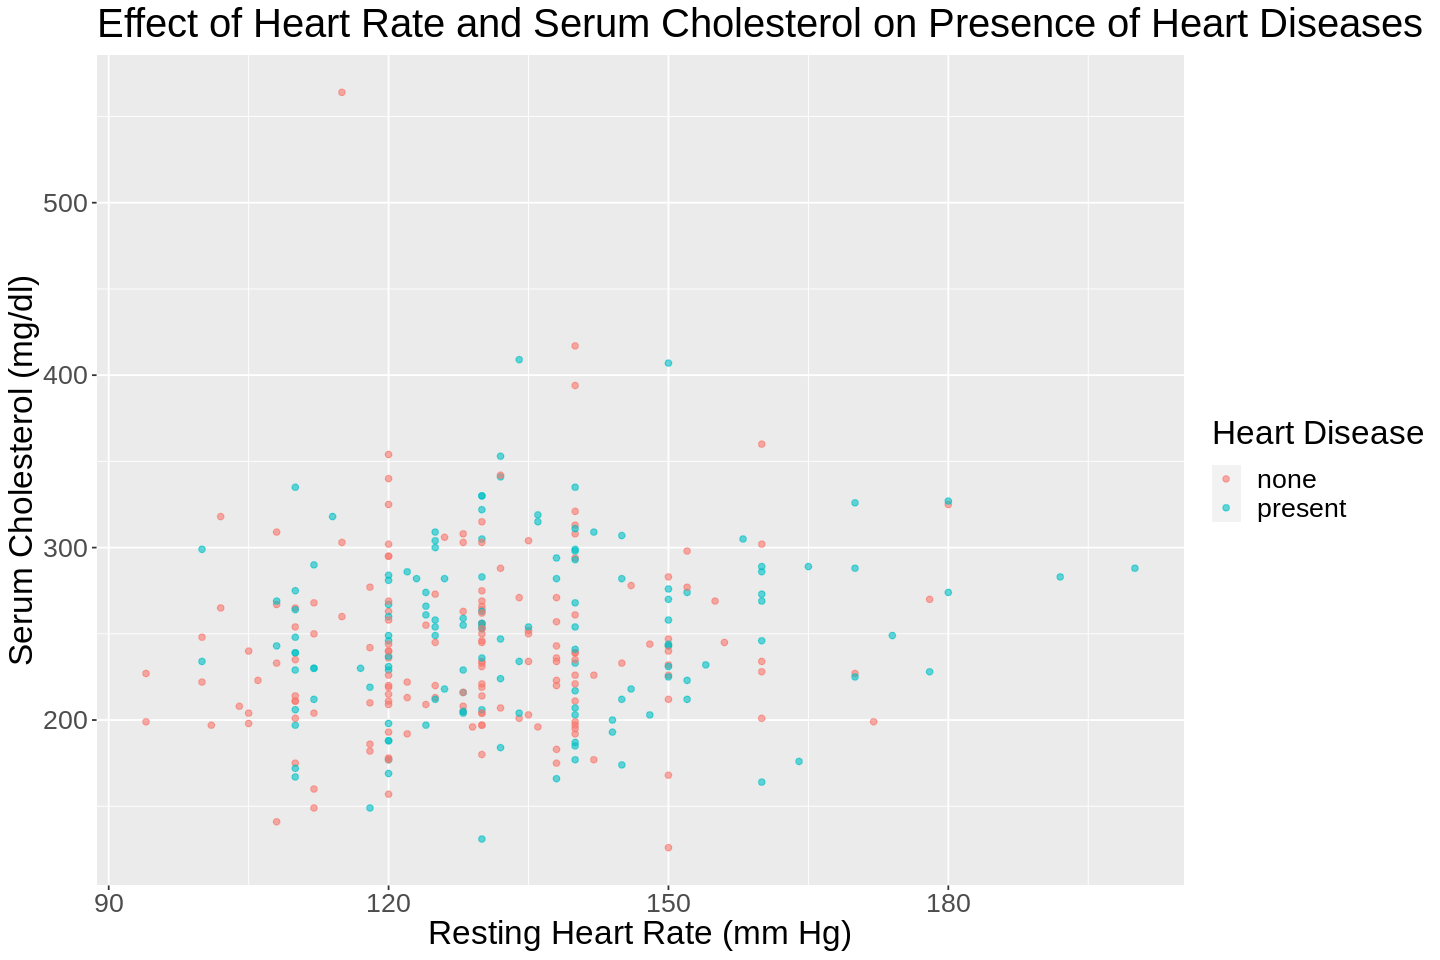

In [15]:
bps_chol <- clean_heart_data |>
    ggplot(aes(x = trestbps, y = chol, color = heart_disease)) +
    geom_point(alpha = 0.6) +
    labs(x = "Resting Heart Rate (mm Hg)", 
         y = "Serum Cholesterol (mg/dl)",
         color = "Heart Disease",
         title = "Effect of Heart Rate and Serum Cholesterol on Presence of Heart Diseases") +
    theme(text = element_text(size = 20))
bps_chol

*figure 4*

There does not seem to be a clear, discernable trend to the human eye. We can see, generally, that higher serum cholesterol and higher resting heart rate seem to lead to the presence of heart diseases, but it is not a very strong relationship. We may need to explore further to see if there really is any correlation. Another thing to keep in mind is that this data is not yet standarized, therefore there may be an underlyig trend which is hard to tell from *figure 4*

### Evaluation and Tuning

We will now start to build a predictive model. First of all, we will set a seed so that reproduction of the randomness in our results would be possible. Then we will be splitting the data into a training set, and a testing set:

In [6]:
set.seed(228)

heart_split <- initial_split(clean_heart_data, prop = 0.75, strata = heart_disease)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

heart_proportions <- heart_train |>
    group_by(heart_disease) |>
    summarize(count = n()) |>
    mutate(percent = count/nrow(heart_train))
heart_proportions

heart_disease,count,percent
<fct>,<int>,<dbl>
none,123,0.5418502
present,104,0.4581498


*figure 5*

As we can see, the proportions of the two classes are very similar to the proportions of the origianl data frame. 

In the next step, we will be tuning our classifier model. This involves both cross-validation and parameter value selection, or the selection of a value for *k*. 

For cross-validation, since this dataset is rather small, we likely can afford the computational costs of using a 10-fold cross validation. This will theoretically get us a lower standard error in the model. 

For the parameter value selection, we will test a range of values from *k* = 1 to *k* = 100, by increments of 5. The reason that we have done this is similar to that of the above: this dataset being rather small. In a larger data frame, testing out so many values for the parameter would be time-consuming and mostly not worth the computational costs. 

For the actual steps, we will be designing a recipe and a spec for the model. The recipe will standarize the training data, while the spec will designate a K-nearest neighbor classification method for the model, as well as include a tune() function to test different values for *k*

After that, we will collect the metric to see the accuracies for each value of *k*

In [10]:
heart_vfold <- vfold_cv(heart_train, v = 10, strata = heart_disease)

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_recipe <- recipe(heart_disease ~ trestbps + chol, data = heart_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

heart_results <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = heart_vfold, grid = k_vals) |>
    collect_metrics()

accuracies <- heart_results |>
    filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4836133,10,0.02933749,Preprocessor1_Model01
6,accuracy,binary,0.5199934,10,0.03268188,Preprocessor1_Model02
11,accuracy,binary,0.5538702,10,0.02753238,Preprocessor1_Model03
16,accuracy,binary,0.5410079,10,0.02954356,Preprocessor1_Model04
21,accuracy,binary,0.5156291,10,0.03066828,Preprocessor1_Model05
26,accuracy,binary,0.5163867,10,0.02080380,Preprocessor1_Model06
31,accuracy,binary,0.5396739,10,0.03530595,Preprocessor1_Model07
36,accuracy,binary,0.5165843,10,0.03403415,Preprocessor1_Model08
41,accuracy,binary,0.5252964,10,0.03459330,Preprocessor1_Model09


*figure 6*

Next we will plot the accuracy as a function of the value of *k*:

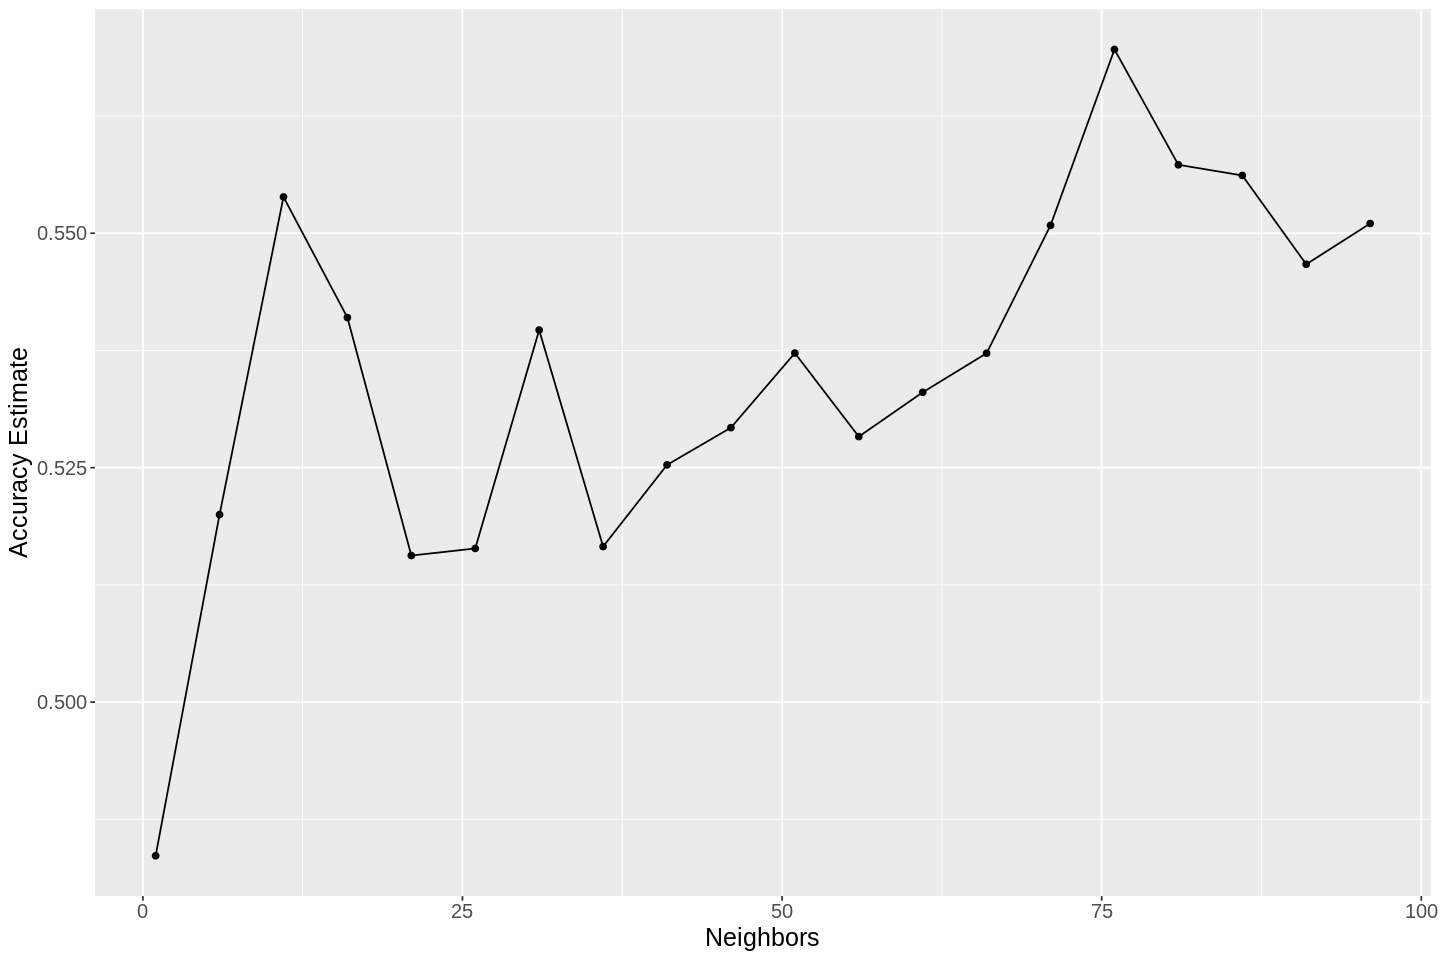

In [12]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") + 
    theme(text = element_text(size = 15))

accuracy_vs_k

*figure 7*